# Random Forest Example using Brazilian Absenteeism Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline
import pandas
import numpy
numpy.random.seed = 0

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Metadata 

### Import Data 

In [2]:
data = pandas.read_csv('https://raw.githubusercontent.com/danielc92/python_nb_sklearn_random_forest/master/Adult-Autism.csv',
                      sep = ",", header = None)

### Assign metadata 

In [3]:
headers = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age_numeric', 'gender', 'ethnicity',
          'jundice', 'autism', 'country_of_resid', 'used_app_before', 'result', 'age_desc', 'relation', 'class']

In [4]:
data.columns = headers

In [5]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country_of_resid,used_app_before,result,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


### Clean Data

In [6]:
data['age_numeric'].unique()

array(['26', '24', '27', '35', '40', '36', '17', '64', '29', '33', '18',
       '31', '30', '34', '38', '42', '43', '48', '37', '55', '50', '53',
       '20', '28', '21', '383', '47', '32', '44', '?', '19', '58', '45',
       '22', '39', '25', '23', '54', '60', '41', '46', '56', '61', '59',
       '52', '49', '51'], dtype=object)

In [7]:
data['age_numeric'] = data['age_numeric'].replace('?',None)
data['age_numeric'] = data['age_numeric'].replace('383',None)
data['age_numeric'] = data['age_numeric'].astype(int)

In [8]:
data['age_numeric_bins_6'] = pandas.cut(data['age_numeric'], bins = 6, precision = 0)

In [9]:
drop_these = ['age_desc', 'age_numeric', 'country_of_resid', 'ethnicity']
data.drop(drop_these, inplace = True, axis = 1)

In [10]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,autism,used_app_before,result,relation,class,age_numeric_bins_6
0,1,1,1,1,0,0,1,1,0,0,f,no,no,no,6,Self,NO,"(25.0, 33.0]"
1,1,1,0,1,0,0,0,1,0,1,m,no,yes,no,5,Self,NO,"(17.0, 25.0]"
2,1,1,0,1,1,0,1,1,1,1,m,yes,yes,no,8,Parent,YES,"(25.0, 33.0]"
3,1,1,0,1,0,0,1,1,0,1,f,no,yes,no,6,Self,NO,"(33.0, 40.0]"
4,1,0,0,0,0,0,0,1,0,0,f,no,no,no,2,?,NO,"(33.0, 40.0]"


In [11]:
data_final = pandas.get_dummies(data = data, drop_first = True)

### Exploration

In [12]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 26 columns):
A1_Score                           704 non-null int64
A2_Score                           704 non-null int64
A3_Score                           704 non-null int64
A4_Score                           704 non-null int64
A5_Score                           704 non-null int64
A6_Score                           704 non-null int64
A7_Score                           704 non-null int64
A8_Score                           704 non-null int64
A9_Score                           704 non-null int64
A10_Score                          704 non-null int64
result                             704 non-null int64
gender_m                           704 non-null uint8
jundice_yes                        704 non-null uint8
autism_yes                         704 non-null uint8
used_app_before_yes                704 non-null uint8
relation_?                         704 non-null uint8
relation_Others                

In [13]:
data_final.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,relation_Others,relation_Parent,relation_Relative,relation_Self,class_YES,"age_numeric_bins_6_(25.0, 33.0]","age_numeric_bins_6_(33.0, 40.0]","age_numeric_bins_6_(40.0, 48.0]","age_numeric_bins_6_(48.0, 56.0]","age_numeric_bins_6_(56.0, 64.0]"
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,...,0.007102,0.071023,0.039773,0.741477,0.268466,0.292614,0.157670,0.086648,0.042614,0.009943
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,...,0.084035,0.257045,0.195564,0.438134,0.443476,0.455286,0.364691,0.281518,0.202128,0.099289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
list(data_final.columns)

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'result',
 'gender_m',
 'jundice_yes',
 'autism_yes',
 'used_app_before_yes',
 'relation_?',
 'relation_Others',
 'relation_Parent',
 'relation_Relative',
 'relation_Self',
 'class_YES',
 'age_numeric_bins_6_(25.0, 33.0]',
 'age_numeric_bins_6_(33.0, 40.0]',
 'age_numeric_bins_6_(40.0, 48.0]',
 'age_numeric_bins_6_(48.0, 56.0]',
 'age_numeric_bins_6_(56.0, 64.0]']

### Create feature matrix and target vector

In [18]:
X = data_final.drop(['autism_yes'], axis = 1)
y = data_final['autism_yes']

In [19]:
X.shape

(704, 25)

In [20]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,relation_Others,relation_Parent,relation_Relative,relation_Self,class_YES,"age_numeric_bins_6_(25.0, 33.0]","age_numeric_bins_6_(33.0, 40.0]","age_numeric_bins_6_(40.0, 48.0]","age_numeric_bins_6_(48.0, 56.0]","age_numeric_bins_6_(56.0, 64.0]"
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,1,0,0,1,1,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: autism_yes, dtype: uint8

In [22]:
y.shape

(704,)

### Instantiate model using RandomForestClassifier

In [23]:
clf = RandomForestClassifier(n_estimators = 120,
                             n_jobs = 2,
                            random_state = 0)


### Recursive Feature Elimination

In [24]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, n_features_to_select = 10)
rfe = rfe.fit(X, y)
results = list(rfe.support_)

In [25]:
rfe_data = pandas.concat([pandas.Series(results), pandas.Series(X.columns)], axis = 1)
rfe_data.columns = ["flag", "column_name"]

In [26]:
rfe_data

,flag,column_name
0,False,A1_Score
1,True,A2_Score
2,False,A3_Score
3,True,A4_Score
4,False,A5_Score
5,False,A6_Score
6,True,A7_Score
7,True,A8_Score
8,False,A9_Score
9,False,A10_Score


In [27]:
relevant_columns = list(rfe_data[rfe_data["flag"] == True]["column_name"])

In [28]:
relevant_columns

['A2_Score',
 'A4_Score',
 'A7_Score',
 'A8_Score',
 'result',
 'gender_m',
 'jundice_yes',
 'relation_Self',
 'age_numeric_bins_6_(25.0, 33.0]',
 'age_numeric_bins_6_(33.0, 40.0]']

In [29]:
X = X[relevant_columns]

### Split dataset into training and testing sets 

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                               random_state = 42,
                                               test_size = 0.30)

### Fit model to training data

In [31]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predict against Xtest set using model

In [32]:
prediction = clf.predict(Xtest)

### Show Accuracy Score

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
acc = accuracy_score(prediction, ytest)

print("Accuracy of prediction against test data: {0:.2%}".format(acc))

Accuracy of prediction against test data: 84.91%


### Confusion Matrix, predicted vs true labels

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

Text(124.71,0.5,'Predicted label')

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

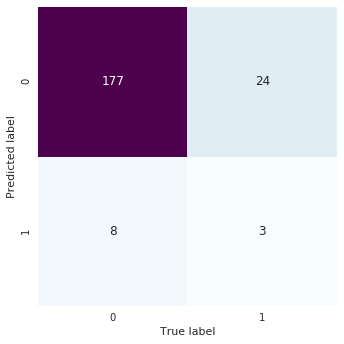

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

matrix = confusion_matrix(ytest, prediction)
seaborn.heatmap(matrix.T, 
                square = True, 
                annot = True, 
                fmt = "d", 
                cmap = "BuPu",
                cbar = False,
                xticklabels = list(ytest.unique()),
                yticklabels = list(ytest.unique()))

plt.xlabel("True label")
plt.ylabel("Predicted label")